<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [ ]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [ ]:
PLACE_NAME = "les Corts, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

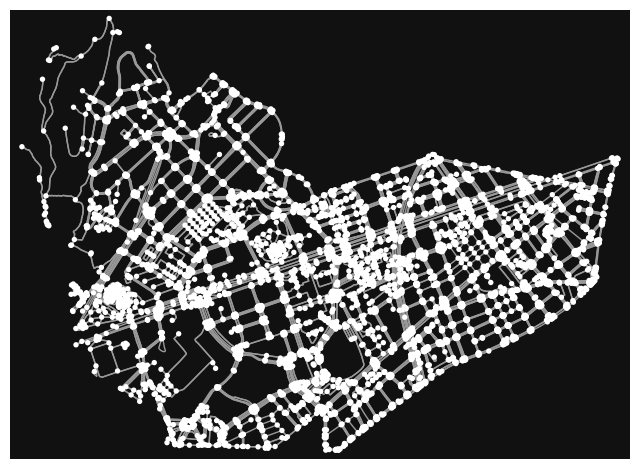

In [ ]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [ ]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-5-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_sp

name  ref  \
element_type osmid                                               
node         2629932730                      NH Les Corts  NaN   
             5372082832                  Churrería Montse  NaN   
             8265818805                          Rocòdrom  NaN   
way          35814815    Facultat de Ciències de la Terra  NaN   
             36335613               Geociencies Barcelona  NaN   

                                                                  geometry  \
element_type osmid                                                           
node         2629932730                           POINT (2.13657 41.38750)   
             5372082832                           POINT (2.13385 41.38460)   
             8265818805                           POINT (2.12815 41.38467)   
way          35814815    POLYGON ((2.11888 41.38431, 2.11969 41.38451, ...   
             36335613    POLYGON ((2.11888 41.38443, 2.11918 41.38451, ...   

                        addr:housenumber                         addr:street  \
element_type osmid                                                             
node         2629932730              292             Travessera de les Corts   
             5372082832              NaN                                 NaN   
             8265818805               33  Carrer de Dolors Masferrer i Bosch   
way          35814815                NaN          Carrer de Martí i Franquès   
             36335613                NaN      Carrer de Lluís Solé i Sabarís   

                         addr:city addr:country addr:postcode     branch  \
element_type osmid                                                         
node         2629932730  Barcelona           ES         08029  Les Corts   
             5372082832        NaN          NaN           NaN        NaN   
             8265818805  BARCELONA          NaN         08028        NaN   
way          35814815    Barcelona          NaN           NaN        NaN   
             36335613    Barcelona          NaN         08028        NaN   

                           building  ... short_name  fax alt_name:ca  bar  \
element_type osmid                   ...                                    
node         2629932730         yes  ...        NaN  NaN         NaN  NaN   
             5372082832       kiosk  ...        NaN  NaN         NaN  NaN   
             8265818805      public  ...        NaN  NaN         NaN  NaN   
way          35814815           yes  ...        NaN  NaN         NaN  NaN   
             36335613    university  ...        NaN  NaN         NaN  NaN   

                        payment:credit_cards payment:debit_cards reservation  \
element_type osmid                                                             
node         2629932730                  NaN                 NaN         NaN   
             5372082832                  NaN                 NaN         NaN   
             8265818805                  NaN                 NaN         NaN   
way          35814815                    NaN                 NaN         NaN   
             36335613                    NaN                 NaN         NaN   

                        not:name brand:wikipedia payment:cash  
element_type osmid                                             
node         2629932730      NaN             NaN          NaN  
             5372082832      NaN             NaN          NaN  
             8265818805      NaN             NaN          NaN  
way          35814815        NaN             NaN          NaN  
             36335613        NaN             NaN          NaN  

[5 rows x 142 columns]

<Axes: >

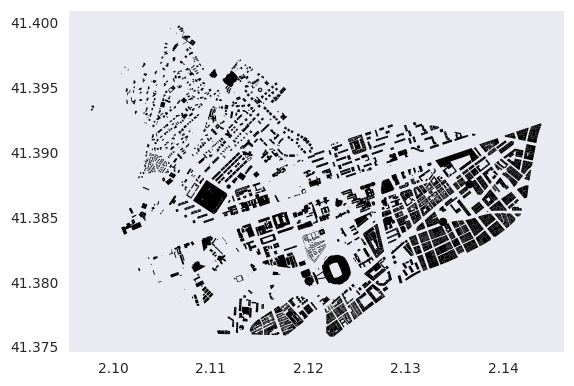

In [ ]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [ ]:
hospital = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "hospital"
    }
)
hospital.head()

<ipython-input-7-88877ef934a4>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  hospital = osmnx.geometries_from_place(


amenity  \
element_type osmid                 
way          446633305  hospital   
             649274874  hospital   
             649274937  hospital   
             652138716  hospital   

                                                                 geometry  \
element_type osmid                                                          
way          446633305  POLYGON ((2.10238 41.38510, 2.10233 41.38513, ...   
             649274874  POLYGON ((2.12459 41.38479, 2.12526 41.38504, ...   
             649274937  POLYGON ((2.12293 41.38504, 2.12295 41.38505, ...   
             652138716  POLYGON ((2.12960 41.39010, 2.12982 41.39016, ...   

                                                       name  \
element_type osmid                                            
way          446633305            Hospital Sant Joan de Déu   
             649274874  Hospital Universitari Quirón Dexeus   
             649274937             Hospital Casa Maternitat   
             652138716                Hospital de Barcelona   

                                                    name:ca  \
element_type osmid                                            
way          446633305            Hospital Sant Joan de Déu   
             649274874  Hospital Universitari Quirón Dexeus   
             649274937                                  NaN   
             652138716                Hospital de Barcelona   

                                                                    nodes  \
element_type osmid                                                          
way          446633305  [4438770125, 8520722462, 8520722463, 443877012...   
             649274874  [3006740684, 1586786741, 6093696718, 609369671...   
             649274937  [6093697741, 6093697918, 6093697734, 609369792...   
             652138716  [6114337951, 6114337949, 1375049358, 137504933...   

                       emergency healthcare wheelchair   wikidata  \
element_type osmid                                                  
way          446633305       yes   hospital        yes  Q11926104   
             649274874       NaN        NaN        NaN  Q20102153   
             649274937       yes        NaN        NaN        NaN   
             652138716       yes        NaN        NaN  Q31270980   

                                                    wikimedia_commons  \
element_type osmid                                                      
way          446633305             Category:Hospital Sant Joan de Déu   
             649274874         Category:Hospital Universitari Deixeus   
             649274937                                            NaN   
             652138716  Category:Hospital de Barcelona (Diagonal 656)   

                                                     wikipedia         phone  \
element_type osmid                                                             
way          446633305  ca:Hospital Sant Joan de Déu Barcelona           NaN   
             649274874         ca:Hospital Universitari Dexeus  +34932274747   
             649274937                                     NaN           NaN   
             652138716                ca:Hospital de Barcelona           NaN   

                                                            website  \
element_type osmid                                                    
way          446633305                                          NaN   
             649274874  https://www.quironsalud.es/dexeus-barcelona   
             649274937                                          NaN   
             652138716                                          NaN   

                       addr:housename  building building:levels  \
element_type osmid                                                
way          446633305            NaN       NaN             NaN   
             649274874            NaN       NaN             NaN   
             649274937   Pavelló Blau  hospital               6   
             652138716     

### 🎢 Putting it all together in one map

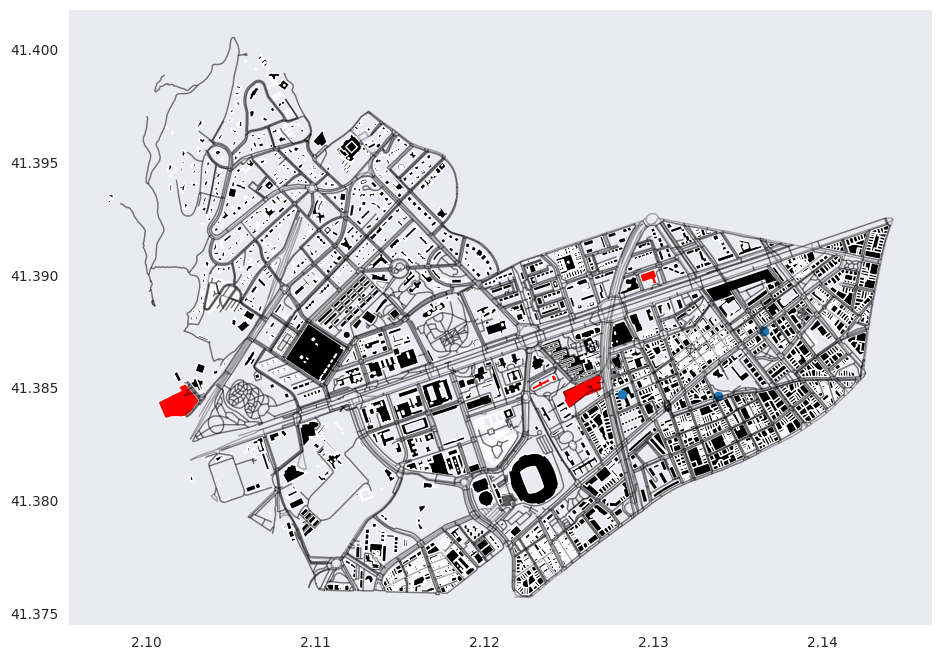

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot hospitals
hospital.plot(ax=ax, facecolor="red", markersize=10)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

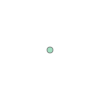

In [ ]:
coords = (2.12897, 41.38658)
p = Point(coords)
p

In [ ]:
print(p.x, p.y)

2.12897 41.38658


In [ ]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

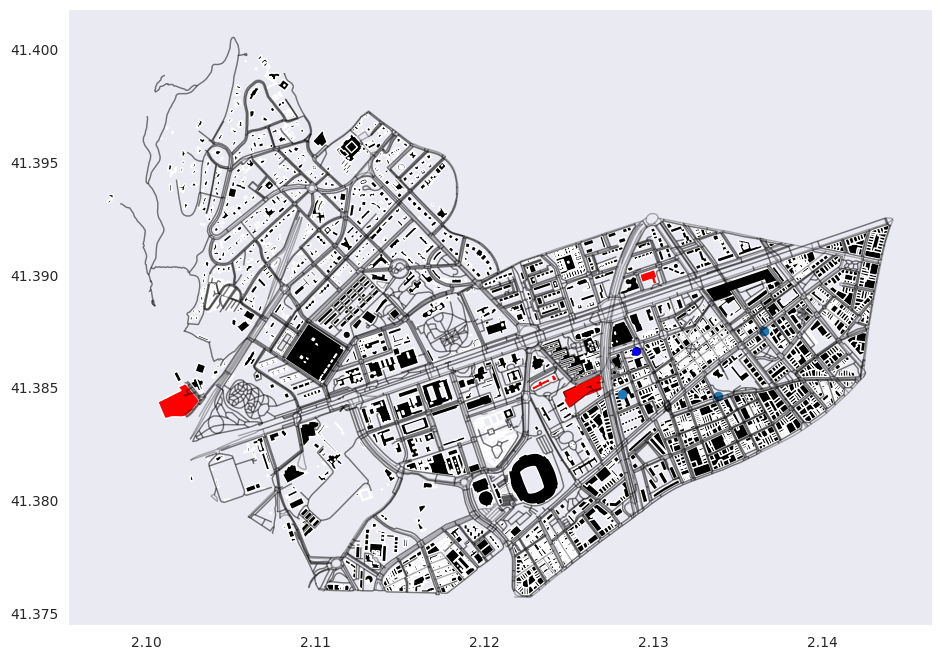

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot hospitals
hospital.plot(ax=ax, facecolor="red", markersize=10)

# Plot Roca Barcelona galleery
geom.plot(ax=ax, facecolor="blue", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [ ]:
our_place = "Roca Barcelona gallery"  # "gallery"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


geometry                                            address
0  POINT (2.12898 41.38658)  Roca Barcelona Gallery, 211-213, Carrer de Joa...

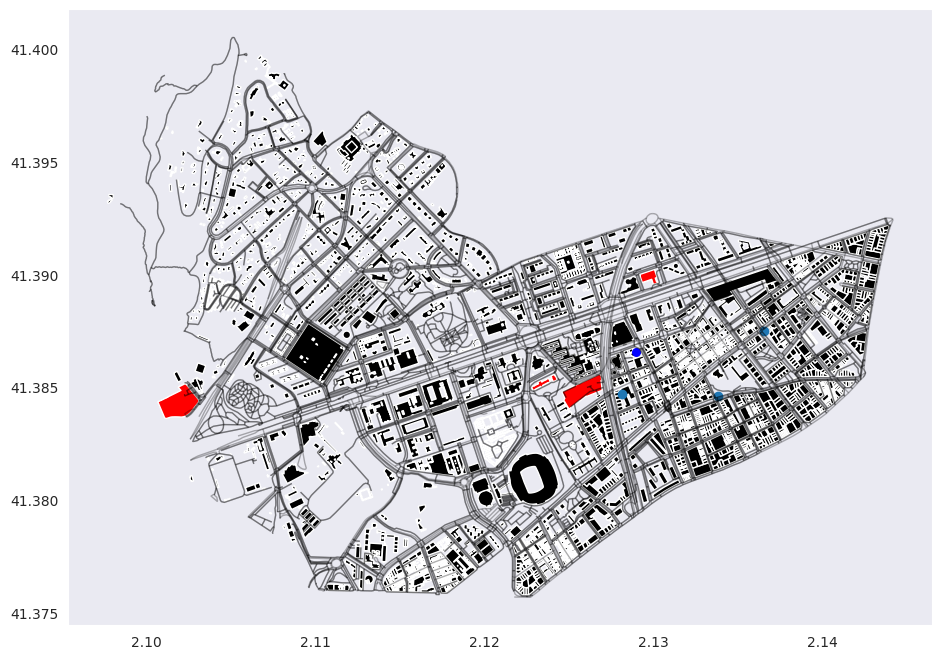

In [ ]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot hospitals
hospital.plot(ax=ax, facecolor="red", markersize=10)

# Plot Roca
geocoded_addresses.plot(ax=ax, facecolor="blue", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [50]:
rad = p.buffer(0.008 * 1)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=buildings.crs
)

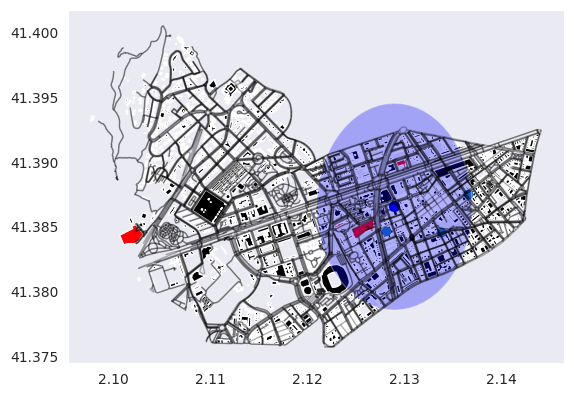

In [51]:
import matplotlib.pyplot as plt

# Create a new figure
fig, ax = plt.subplots()

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot hospital
hospital.plot(ax=ax, facecolor="red", markersize=10)

# Plot Roca
geocoded_addresses.plot(ax=ax, facecolor="blue", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="blue", alpha=0.3)

plt.show()

In [52]:
accessible_hospital = [h for h in hospital["geometry"] if isinstance(h, Point) and h.within(rad["geometry"][0])]
accessible_hospital = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_hospital,
    },
    crs=buildings.crs
)

ValueError: aspect must be finite and positive 

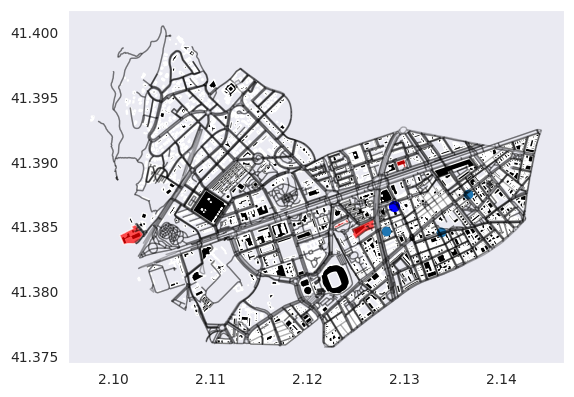

In [53]:
import matplotlib.pyplot as plt

# Create a new figure
fig, ax = plt.subplots()

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot hospitals
hospital.plot(ax=ax, facecolor="red", markersize=10, alpha=0.7)

# Plot Roca
geocoded_addresses.plot(ax=ax, color="blue", markersize=50)
rad.plot(ax=ax, linewidth=1, color="blue", alpha=0.3)

accessible_hospital.plot(ax=ax, facecolor="green", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

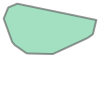

In [54]:
zone = edges.unary_union.convex_hull
zone

In [55]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 5266,
 'm': 15054,
 'k_avg': 5.717432586403342,
 'edge_length_total': 521276.99999999854,
 'edge_length_avg': 34.62714228776395,
 'streets_per_node_avg': 3.2707937713634636,
 'streets_per_node_counts': {0: 0, 1: 307, 2: 14, 3: 2932, 4: 1972, 5: 41},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.058298518799848084,
  2: 0.002658564375237372,
  3: 0.5567793391568553,
  4: 0.37447778199772125,
  5: 0.007785795670338018},
 'intersection_count': 4959,
 'street_length_total': 299352.15099999943,
 'street_segment_count': 8484,
 'street_length_avg': 35.28431765676561,
 'circuity_avg': 1.0385866240335158,
 'self_loop_proportion': 0.0011786892975011788,
 'node_density_km': 6744615777847.411,
 'intersection_density_km': 6351414668124.821,
 'edge_density_km': 667643957240591.5,
 'street_density_km': 383405856583204.9}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [65]:
origin = (
    osmnx.geocode_to_gdf("Nostra Senyora del Remei")  # "gallery"
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Hospital Universitari Quirón Dexeus")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

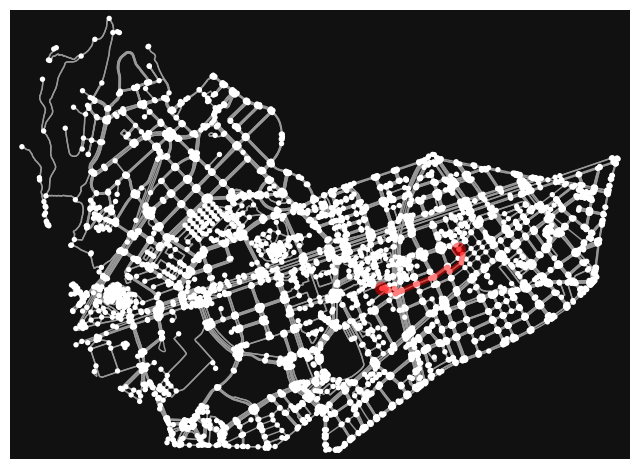

In [66]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [67]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

<ipython-input-67-3f1016416ab9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.00806
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


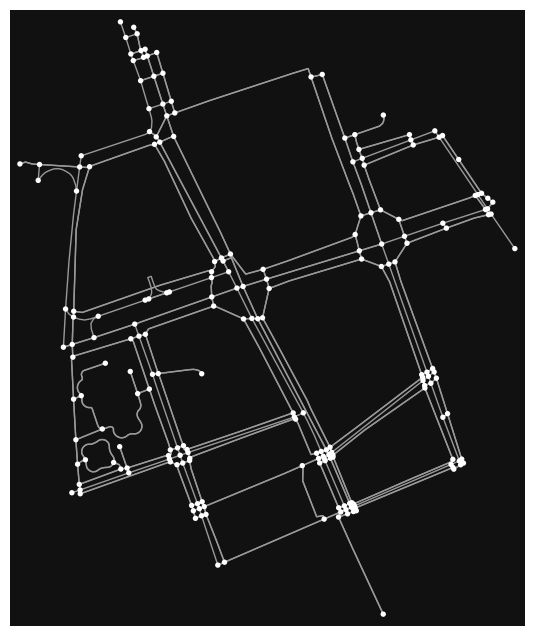

In [69]:
# getting iaac node from the graph:
church_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, church_node, max_dist=300)
figure, ax = osmnx.plot_graph(g)


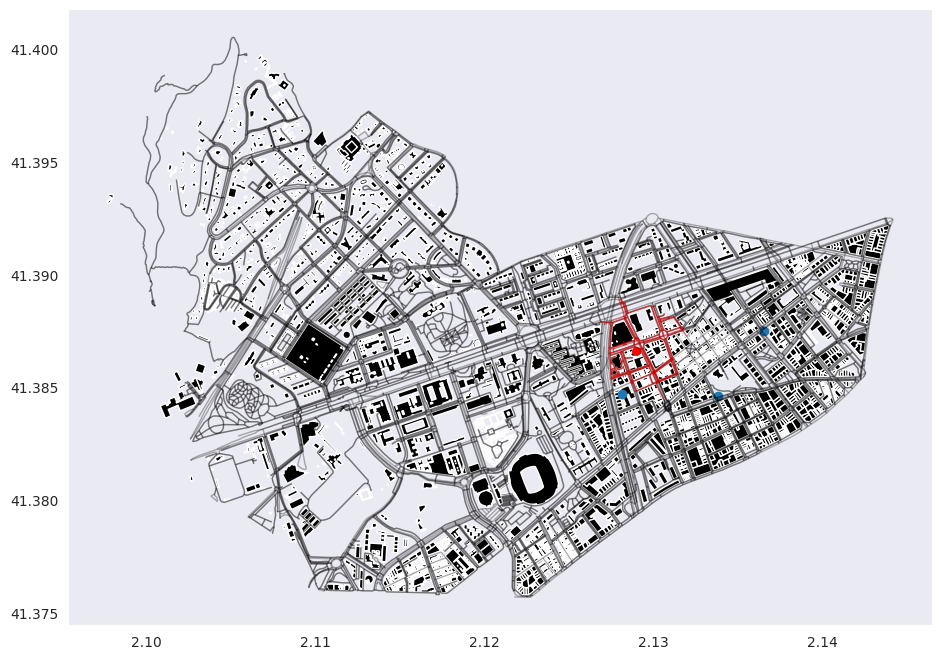

In [70]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

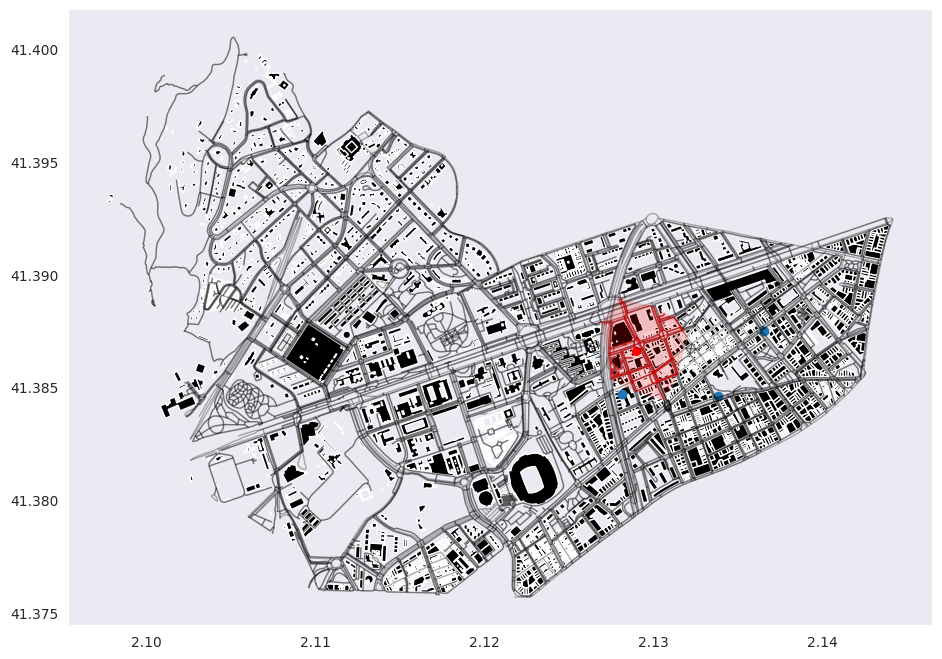

In [71]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
buildings.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=buildings.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.